In [370]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse.linalg as sla
from scipy.stats import multivariate_normal

# load the data
X = np.loadtxt("C:/Users/Danie_000/OneDrive/python/pythonproject/mixture.txt")
print("X.shape:", X.shape)

X.shape: (300, 2)


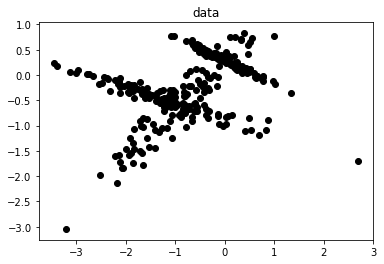

In [371]:
fig = plt.figure()
ax = fig.add_subplot(111)  # the projection part is important
ax.scatter(X[:, 0], X[:, 1], color="black")  # also show the real data
ax.set_title("data")
plt.show()

In [420]:
K=3
t=0
iteration=np.zeros((10,))

In [432]:
#initialization
means=np.zeros((K,X.shape[1]))
covs=np.zeros((K,X.shape[1],X.shape[1]))
pi=np.zeros((K,))
gamma=np.zeros((X.shape[0],K))
for k in range(K):
    means[k]=X[np.random.randint(X.shape[0])]
    covs[k]=np.identity(2)
    pi[k]=1.0/K

#EM Algorithm    
maxll=-1000
while np.abs(ll-maxll)>0.001:
    maxll=ll
    ll=0
    
    #Evaluate the posterior probability γik
    for i in range(X.shape[0]):
        for k in range(K):
            sum=0
            for j in range(K):
                sum+=pi[j]*multivariate_normal.pdf(X[i],means[j], covs[j])
            gamma[i][k]=pi[k]*multivariate_normal.pdf(X[i],means[k], covs[k])/sum
            
    #upgrade pi, means, covariances
    N=np.sum(gamma,axis=0)
    pi=N/X.shape[0]
    for k in range(K):
        summean=0
        for i in range(X.shape[0]):
            summean+=gamma[i][k]*X[i]
        means[k]=summean/N[k]

    for k in range(K):
        sumcov=0
        for i in range(X.shape[0]):
            sumcov+=gamma[i][k]*np.dot((X[i]-means[k]).reshape(2,1),(X[i]-means[k]).reshape(1,2))
        covs[k]=sumcov/N[k]
        
    for i in range(X.shape[0]):
        sumK=0
        for k in range(K):
            sumK+=pi[k]*multivariate_normal.pdf(X[i],means[k], covs[k])
        ll+=np.log(sumK)    
    iteration[t]+=1
    
t+=1
print('try ',t)
print(ll)
print(iteration)

try  10
-337.3823892442365
[19. 17. 14. 34. 21. 33. 14. 31. 15. 19.]


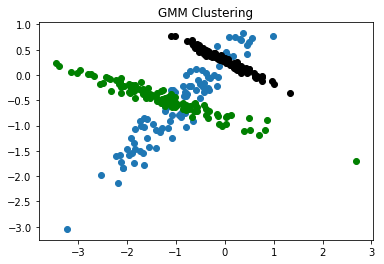

In [427]:
X1=np.zeros((X.shape[1],))
X2=np.zeros((X.shape[1],))
X3=np.zeros((X.shape[1],))
for i in range(X.shape[0]):
    if np.argmax(gamma[i])==0:
        X1=np.vstack((X1,X[i]))
    if np.argmax(gamma[i])==1:
        X2=np.vstack((X2,X[i]))
    if np.argmax(gamma[i])==2:
        X3=np.vstack((X3,X[i]))
fig = plt.figure(2)
ax = fig.add_subplot(111)  # the projection part is important

ax.scatter(X1[1:, 0], X1[1:, 1])  # also show the real data
ax.scatter(X2[1:, 0], X2[1:, 1],color='black')  # also show the real data
ax.scatter(X3[1:, 0], X3[1:, 1],color='green')  # also show the real data
ax.set_title("GMM Clustering")
plt.show()

In [433]:
K=3
t=0
iteration2=np.zeros((10,))

In [443]:
#initialization
means=np.zeros((K,X.shape[1]))
covs=np.zeros((K,X.shape[1],X.shape[1]))
pi=np.zeros((K,))
gamma=np.zeros((X.shape[0],K))
for i in range(X.shape[0]):
    gamma[i][np.random.randint(3)]=1

#EM Algorithm    
maxll=-1000
while np.abs(ll-maxll)>0.001:
    maxll=ll
    ll=0
    #M-Step
    N=np.sum(gamma,axis=0)
    pi=N/X.shape[0]
    for k in range(K):
        summean=0
        for i in range(X.shape[0]):
            summean+=gamma[i][k]*X[i]
        means[k]=summean/N[k]

    for k in range(K):
        sumcov=0
        for i in range(X.shape[0]):
            sumcov+=gamma[i][k]*np.dot((X[i]-means[k]).reshape(2,1),(X[i]-means[k]).reshape(1,2))
        covs[k]=sumcov/N[k]
        
    #E-step
    for i in range(X.shape[0]):
        for k in range(K):
            sum=0
            for j in range(K):
                sum+=pi[j]*multivariate_normal.pdf(X[i],means[j], covs[j])
            gamma[i][k]=pi[k]*multivariate_normal.pdf(X[i],means[k], covs[k])/sum
            
    for i in range(X.shape[0]):
        sumK=0
        for k in range(K):
            sumK+=pi[k]*multivariate_normal.pdf(X[i],means[k], covs[k])
        ll+=np.log(sumK)
    iteration2[t]+=1
t+=1
print('try ',t)
print(ll)
print(iteration2)

try  10
-337.38232546795246
[22. 21. 28. 20. 22. 19. 20. 20. 20. 42.]


Text(0,0.5,'iterations')

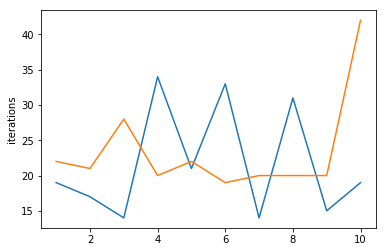

In [459]:
fig = plt.figure()
ax1 = fig.add_subplot(111)  # the projection part is important
ax1.plot(np.arange(1,11),iteration)
ax1.plot(np.arange(1,11),iteration2)
plt.ylabel('iterations')